# Tutorial 1: Workflow of PyCoM

In this tutorial, with a small example, you will learn how to create a workflow with the local version of PyCoM, using the steps listed below:

1. [Setup](#setup)
2. [Initalise pycom objects](#initalise-pycom-objects)
3. [Create a query dictionary](#create-a-query-dictionary)
4. [Save and retrieve progress](#save-and-retrieve-progress)
5. [Analyse search results](#analyse-search-results)
6. [Add biological features](#add-biological-features)
7. [Some statistics](#some-statistics)
8. [Coevolution matrix analysis](#coevolution-matrix-analysis)
9. [Help on UniProt Controlled Vocabulary](#help-on-uniprot-controlled-vocabulary)

### Setup

The assumption is that you have completed the [installation](https://pycom.brunel.ac.uk/install.html) and [downloaded](https://pycom.brunel.ac.uk/database.html) the database. For help on this please look at the quick guide [here](https://pycom.brunel.ac.uk/gettingstarted.html).

### Initalise pycom objects
First, lets import all the libraries and classes we need from pycom, pandas, matplotlib, and numpy

In [14]:
# importing all usefull classes from PyCoM
from pycom import PyCom, ProteinParams,CoMAnalysis
import pandas as pd
import numpy as np
# matplotlib; useful for plotting later
import matplotlib
import matplotlib.pyplot as plt
#setting matplotlib parameters
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [15]:
#set the path to the database 
database_folder_path="/Volumes/mason/Work/Sarath/Research/pycom/"
#matrix file name and path
file_matrix_db = database_folder_path+"pycom.mat"
#protein database file name and path
file_protein_db= database_folder_path+"pycom.db"

In [16]:
obj_pycom = PyCom(db_path=file_protein_db, mat_path=file_matrix_db)

### Create a query dictionary

To query the database, we need to create a dictionary object `query_parameters` using the keywords for our choice of properties. For the full list of keywords please check []()

**Empty `query_parameters` will return information on all the ~457,000 proteins in the database**


To query the database, we need to create a dictionary object `query_parameters` using the keywords for our choice of properties. For the full list of keywords please check []()

**Empty `query_parameters` will return information on all the ~457,000 proteins in the database**

In [17]:
#creating empty query dictionary
query_parameters={}

In [18]:
# Here we are asking for all the proteins that match the enzyme class 3 and have been associated with the disease cancer.
query_parameters={ProteinParams.DISEASE:"cancer",
                  ProteinParams.ENZYME: '3.*',
                  ProteinParams.MIN_LENGTH: 100,
                  ProteinParams.MAX_LENGTH: 200,
                 }

Executing the query with the parameters defined in the above cell using the pycom object `obj_pycom` `find()` function will return a pandas dataframe with the search results containing information about all the proteins which match our query.

In [19]:
entries_data_frame=obj_pycom.find(query_parameters)

### Save and retrieve progress

We can save and retreive our progress by saving our dataframe with information on our favourite proteins by saving it to a csv file. 

#### Save the query to a csv file

To avoid rerunning the query we can cave the progress to a csv file.

In [20]:
entries_data_frame.to_csv("output/DB_Query_Results.csv",index=False)

#### Read query data from csv file

Retrieving our progress from the csv file.

In [21]:
#entries_data_frame=pd.read_csv("output/DB_Query_Results.csv")

### Analyse search results

The search returns a pandas data frame with proteins matching the query critiera with following information for each protein:

* uniprot_id: Uniprot ID
* neff: Depth of the sequence alignment $N_{eff}$ 
* sequence_length: Sequence length
* sequence: protein sequence
* organism_id: Organism ID
* helic_frac, turn_frac, strand_frac: helix, turn, and strand structure fraction
* has_ptm: Has a PTM Yes/No
* has_pdb: Has a PDB structure Yes/No
* has_substrate: Has a substrate for biological activity Yes/No
* matrix: coevolution matrix column is empty because at this stage we would still want you to check the search results and if required filter them based on any of the biological properties before loading the matrices.



First, look what columns we have and their names.

In [22]:
entries_data_frame.head()

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate,matrix
0,P01111,12.817,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.349206,0.015873,0.227513,1,1,1,None
1,P01112,12.841,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.317460,0.031746,0.359788,1,1,1,None
2,P01116,12.626,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.375661,0.031746,0.328042,1,1,1,None


`describe()` function from pandas can be used to get a summary of all the features:

In [23]:
entries_data_frame.describe(include="all")

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate,matrix
count,3,3.000000,3.0,3,3,3.000000,3.000000,3.000000,3.0,3.0,3.0,0
unique,3,NaN,NaN,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0
top,P01111,NaN,NaN,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.761333,189.0,NaN,NaN,0.347443,0.026455,0.305115,1.0,1.0,1.0,NaN
std,NaN,0.117815,0.0,NaN,NaN,0.029141,0.009164,0.069054,0.0,0.0,0.0,NaN
min,NaN,12.626000,189.0,NaN,NaN,0.317460,0.015873,0.227513,1.0,1.0,1.0,NaN
25%,NaN,12.721500,189.0,NaN,NaN,0.333333,0.023810,0.277778,1.0,1.0,1.0,NaN
50%,NaN,12.817000,189.0,NaN,NaN,0.349206,0.031746,0.328042,1.0,1.0,1.0,NaN
75%,NaN,12.829000,189.0,NaN,NaN,0.362434,0.031746,0.343915,1.0,1.0,1.0,NaN


Get counts of categorical data in the column, for example:
* number of proteins with a known PDB structure
* number of proteins with a known PTM

In [24]:
entries_data_frame['has_pdb'].value_counts()

has_pdb
1    3
Name: count, dtype: int64

Find number of unique elements in the column, for example number of unique organisms:

In [25]:
entries_data_frame['organism_id'].unique()

array(['9606'], dtype=object)

All the sequences are from the same organism, `9606` i.e. from `Homo sapiens`. Full list is available from [UniProt](https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/docs/speclist.txt)

Some statistics on the numerical column, for example `neff`:

In [26]:
entries_data_frame["neff"].describe()

count     3.000000
mean     12.761333
std       0.117815
min      12.626000
25%      12.721500
50%      12.817000
75%      12.829000
max      12.841000
Name: neff, dtype: float64

We can also use other functions to get some of the information

In [27]:
entries_data_frame["neff"].min()

12.626

In [28]:
entries_data_frame["neff"].mean()

12.761333333333333

### Add biological features

Initialise the object loader class and then call each add function

1. Add Enzyme Classification 
2. Add CATH Class
3. Add Co-factors
4. Add PTM
5. Add Diseases

For a protein entry if the requested data (EC/CATH/Cofactors...) does not exist, corresponding entry in that column will be `nan`. We can filter such rows as shown further below.

**Please note the dataloader functions will not work with remote version of PyCoM**

In [29]:
#initialise the object for data loader class
obj_data_loader=obj_pycom.get_data_loader()

In [30]:
#add enzyme commission data to the dataframe
entries_data_frame=obj_data_loader.add_enzyme_commission(entries_data_frame,force_single_entry=False)
#add CATH data to the dataframe
entries_data_frame=obj_data_loader.add_cath_class(entries_data_frame,force_single_entry=False)
#add CATH data to the dataframe
entries_data_frame=obj_data_loader.add_pdbs(entries_data_frame,force_single_entry=False)
#get list of all cofactors for each protein
entries_data_frame=obj_data_loader.add_cofactors(entries_data_frame,force_single_entry=False)
#get list of all PTM's for each protein
entries_data_frame=obj_data_loader.add_ptm(entries_data_frame,force_single_entry=False)
#get list of all diseases for each protein
entries_data_frame=obj_data_loader.add_diseases(entries_data_frame,force_single_entry=False)

In [31]:
#get substrates for the proteins
entries_data_frame=obj_data_loader.add_ligand(entries_data_frame,force_single_entry=False)

#### Save the progress to a csv file

As we have added a lot of information to our dataframe, let's save our progress so that we can restart from this point, in future, if required.

In [32]:
entries_data_frame.to_csv("output/DB_Query_Results_With_Details.csv",index=False)

### Some Statistics

Let's look at some statistics for all the columns in the dataframe. Below are some examples of how you can do some fun things with the dataframe.

In [33]:
#include=all will also include columns with 'nan' entries
entries_data_frame.describe(include="all")

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate,matrix,enzyme_commission,cath_class,pdb_id,cofactor,ptm,disease_name,disease_id,ligand
count,3,3.000000,3.0,3,3,3.000000,3.000000,3.000000,3.0,3.0,3.0,0,3,3,3,0,0,3,3,3
unique,3,NaN,NaN,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,3,0,0,3,3,1
top,P01111,NaN,NaN,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[3.6.5.2],[3.40.50.300],"[2N9C, 3CON, 5UHV, 6E6H, 6MPP, 6ULI, 6ULK, 6UL...",NaN,NaN,"[Leukemia, juvenile myelomonocytic, Noonan syn...","[DI-01851, DI-02558, DI-03381, DI-04099, DI-04...","[GTP-binding, Nucleotide-binding]"
freq,1,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,NaN,NaN,1,1,3
mean,NaN,12.761333,189.0,NaN,NaN,0.347443,0.026455,0.305115,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.117815,0.0,NaN,NaN,0.029141,0.009164,0.069054,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,12.626000,189.0,NaN,NaN,0.317460,0.015873,0.227513,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,12.721500,189.0,NaN,NaN,0.333333,0.023810,0.277778,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,12.817000,189.0,NaN,NaN,0.349206,0.031746,0.328042,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,12.829000,189.0,NaN,NaN,0.362434,0.031746,0.343915,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find unique ligands and count them:

In [34]:
entries_data_frame['ligand'].value_counts()

ligand
[GTP-binding, Nucleotide-binding]    3
Name: count, dtype: int64

In [35]:
# Filter the search results where we have a ligand interacting with the protein
df_results_with_ligand=entries_data_frame[entries_data_frame['ligand'].notna()]

Count columns without 'nan' entries

In [36]:
#Number of proteins with pdb data
df_results_with_ligand["pdb_id"].notna().sum()

3

### Coevolution matrix analysis

#### Load the matrix
Lets get the coevolution matrix for the filtered dataframe `df_results_with_ligand` using the `load_matrices()` from `obj_pycom`

In [37]:
df_results_with_ligand=obj_pycom.load_matrices(df_results_with_ligand)

In [38]:
df_results_with_ligand

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate,matrix,enzyme_commission,cath_class,pdb_id,cofactor,ptm,disease_name,disease_id,ligand
0,P01111,12.817,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.349206,0.015873,0.227513,1,1,1,"[[0.0, 0.5163763761520386, 0.3219393491744995,...",[3.6.5.2],[3.40.50.300],"[2N9C, 3CON, 5UHV, 6E6H, 6MPP, 6ULI, 6ULK, 6UL...",NaN,NaN,"[Leukemia, juvenile myelomonocytic, Noonan syn...","[DI-01851, DI-02558, DI-03381, DI-04099, DI-04...","[GTP-binding, Nucleotide-binding]"
1,P01112,12.841,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.317460,0.031746,0.359788,1,1,1,"[[0.0, 0.5560339689254761, 0.34521734714508057...",[3.6.5.2],[3.40.50.300],"[121P, 1AA9, 1AGP, 1BKD, 1CLU, 1CRP, 1CRQ, 1CR...",NaN,NaN,"[Costello syndrome, Congenital myopathy with e...","[DI-01437, DI-01411, DI-04532, DI-02612, DI-03...","[GTP-binding, Nucleotide-binding]"
2,P01116,12.626,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.375661,0.031746,0.328042,1,1,1,"[[0.0, 0.38467222452163696, 0.3104382753372192...",[3.6.5.2],[3.40.50.300],"[1D8D, 1D8E, 1KZO, 1KZP, 1N4P, 1N4Q, 1N4R, 1N4...",NaN,NaN,"[Leukemia, acute myelogenous, Leukemia, juveni...","[DI-01171, DI-01851, DI-02073, DI-02971, DI-03...","[GTP-binding, Nucleotide-binding]"


#### Normalise/Scale the matrix

**Scaled matrix ($S_{i}$)**: Coevolution Matrices ($C_{i}$) have to be scaled by average $\langle{C_{i}}\rangle$, all values < $\langle{C_{i}}\rangle$ are set to 0.

**Normalised matrix ($N_{i}$)**: For comparing scaled coevolution scores across multiple proteins, we can normalise the values of all matrices ${S_{i}...S_{n}}$, by dividing them by the $\max({S_{i}...S_{n}})$.

These operations can be performed by using *object* from `CoMAnalysis` class.

In [39]:
#initialise CoMAnalysis class object
obj_com_analysis=CoMAnalysis()

In [40]:
df_results_with_ligand_matrix=obj_com_analysis.scale_and_normalise_coevolution_matrices(df_results_with_ligand)

In [41]:
df_results_with_ligand_matrix.head()

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,...,enzyme_commission,cath_class,pdb_id,cofactor,ptm,disease_name,disease_id,ligand,matrix_S,matrix_N
0,P01111,12.817,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.349206,0.015873,0.227513,1,1,...,[3.6.5.2],[3.40.50.300],"[2N9C, 3CON, 5UHV, 6E6H, 6MPP, 6ULI, 6ULK, 6UL...",NaN,NaN,"[Leukemia, juvenile myelomonocytic, Noonan syn...","[DI-01851, DI-02558, DI-03381, DI-04099, DI-04...","[GTP-binding, Nucleotide-binding]","[[0.0, 2.4990853333930714, 1.5580765172867141,...","[[0.0, 0.18836677642207234, 0.1174389073708615..."
1,P01112,12.841,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.317460,0.031746,0.359788,1,1,...,[3.6.5.2],[3.40.50.300],"[121P, 1AA9, 1AGP, 1BKD, 1CLU, 1CRP, 1CRQ, 1CR...",NaN,NaN,"[Costello syndrome, Congenital myopathy with e...","[DI-01437, DI-01411, DI-04532, DI-02612, DI-03...","[GTP-binding, Nucleotide-binding]","[[0.0, 2.4841366766214805, 1.5422925960913767,...","[[0.0, 0.18724003206873668, 0.1162492055567066..."
2,P01116,12.626,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.375661,0.031746,0.328042,1,1,...,[3.6.5.2],[3.40.50.300],"[1D8D, 1D8E, 1KZO, 1KZP, 1N4P, 1N4Q, 1N4R, 1N4...",NaN,NaN,"[Leukemia, acute myelogenous, Leukemia, juveni...","[DI-01171, DI-01851, DI-02073, DI-02971, DI-03...","[GTP-binding, Nucleotide-binding]","[[0.0, 1.8285180440964264, 1.4756510916226846,...","[[0.0, 0.1378232447662731, 0.1112261496390277,..."


`matrix_S` column contains the $S_{i}$ matrix and the `matrix_N` column contains $N_{i}$

#### Plot the matrix and save it

Lets plot the matrix for the first `(index is 0)` protein in the dataframe.

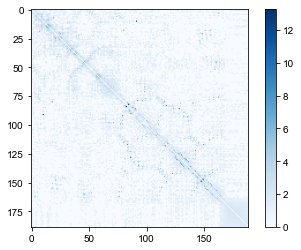

In [42]:
plt.imshow(df_results_with_ligand_matrix.loc[0,'matrix_S'],cmap='Blues')
plt.colorbar()
file_name="output/%s_Scaled_Matrix.png"%(df_results_with_ligand_matrix.loc[0,'uniprot_id'])
plt.savefig(file_name,dpi=300)

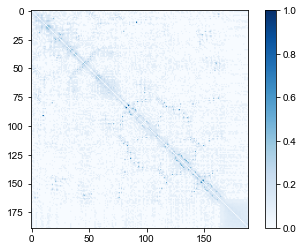

In [43]:
plt.imshow(df_results_with_ligand_matrix.loc[0,'matrix_N'],cmap='Blues')
plt.colorbar()
file_name="output/%s_Normalised_Matrix.png"%(df_results_with_ligand_matrix.loc[0,'uniprot_id'])
plt.savefig(file_name,dpi=300)

#### Save the list of top coevolution pairs

Residues with scores close to 1 have the strongest evolutionary relationship, and close to 0 may not be covarying during evolution.

The top scoring residues are sorted in descending order and saved to an ASCII file for further interpretation.

In [44]:
obj_com_analysis.save_top_scoring_residue_pairs(df_results_with_ligand_matrix,data_folder="output",matrix_type="matrix_N",res_gap=5,percentile=95)

Saved file : output/P01111_Pairs.txt
Saved file : output/P01112_Pairs.txt
Saved file : output/P01116_Pairs.txt


### Help on UniProt Controlled Vocabulary 

For each biological feature category, UniProtKB/Swiss-Prot has a curated list of [keywords](https://www.uniprot.org/help/controlled_vocabulary). To search using those keywords or ID's and help you find them we have some helper functions that will help you find them:

Function `get_cofactor_list()` from `pycom` will get you list of cofactors. You can either use the `cofactorId` or the `cofactorName`.

In [45]:
# list of cofactors
cofactors = obj_pycom.get_cofactor_list()
cofactors

,cofactorId,cofactorName
0,CHEBI:597326,pyridoxal 5'-phosphate
1,CHEBI:18420,Mg(2+)
2,CHEBI:60240,a divalent metal cation
3,CHEBI:30413,heme
4,CHEBI:29105,Zn(2+)
...,...,...
109,CHEBI:61721,chlorophyll b
110,CHEBI:73095,divinyl chlorophyll a
111,CHEBI:73096,divinyl chlorophyll b
112,CHEBI:57453,"(6S)-5,6,7,8-tetrahydrofolate"


Function `get_disease_list()` from `pycom` will get you list of diseases. You can either use the `diseaseId` or the `diseaseName`.

In [46]:
# list of diseases
diseases = obj_pycom.get_disease_list()
diseases


,diseaseId,diseaseName
0,DI-04420,"Intellectual developmental disorder, autosomal..."
1,DI-00085,Alzheimer disease 1
2,DI-00097,"Cerebral amyloid angiopathy, APP-related"
3,DI-00262,Chanarin-Dorfman syndrome
4,DI-01042,"Spastic paraplegia 42, autosomal dominant"
...,...,...
6039,DI-05800,"Wieacker-Wolff syndrome, female-restricted"
6040,DI-01041,"Spastic paraplegia 33, autosomal dominant"
6041,DI-05703,Neurodevelopmental disorder with dysmorphic fa...
6042,DI-06050,"Intellectual developmental disorder, autosomal..."


Function `get_organism_list()` from `pycom` will get you list of diseases. You can either use the `organismId` or the `nameScientific` or `nameCommon` or any categories in the `taxonomy`.

In [47]:
# list of organisms
organisms = obj_pycom.get_organism_list()
organisms

,organismId,nameScientific,nameCommon,taxonomy
0,561445,African swine fever virus (isolate Pig/Kenya/K...,ASFV,:Viruses:Varidnaviria:Bamfordvirae:Nucleocytov...
1,10500,African swine fever virus (isolate Tick/Malawi...,ASFV,:Viruses:Varidnaviria:Bamfordvirae:Nucleocytov...
2,561443,African swine fever virus (isolate Tick/South ...,ASFV,:Viruses:Varidnaviria:Bamfordvirae:Nucleocytov...
3,561444,African swine fever virus (isolate Warthog/Nam...,ASFV,:Viruses:Varidnaviria:Bamfordvirae:Nucleocytov...
4,10498,African swine fever virus (strain Badajoz 1971...,Ba71V,:Viruses:Varidnaviria:Bamfordvirae:Nucleocytov...
...,...,...,...,...
14316,31581,Rotavirus A (isolate RVA/Pig/Australia/TFR-41/...,RV-A,:Viruses:Riboviria:Orthornavirae:Duplornaviric...
14317,31579,Rotavirus A (isolate RVA/Pig/Australia/BEN144/...,RV-A,:Viruses:Riboviria:Orthornavirae:Duplornaviric...
14318,10918,Rotavirus A (strain RVA/Pig/Russia/K/1987),RV-A,:Viruses:Riboviria:Orthornavirae:Duplornaviric...
14319,31580,Rotavirus A (isolate RVA/Pig/Australia/BMI-1/1...,RV-A,:Viruses:Riboviria:Orthornavirae:Duplornaviric...


In [48]:
#full list of helper functions to get searchable terms on other biological categories
obj_pycom.get_biological_process_list()
obj_pycom.get_cellular_component_list()
obj_pycom.get_developmental_stage_list()
obj_pycom.get_domain_list()
obj_pycom.get_ligand_list()
obj_pycom.get_ptm_list()
obj_pycom.get_molecular_function_list()

,name
0,Acetylcholine receptor inhibiting toxin
1,Actin-binding
2,Activator
3,Acyltransferase
4,Allosteric enzyme
...,...
191,Viral short tail ejection system
192,Viral exotoxin
193,Chloride channel impairing toxin
194,Proton-gated sodium channel impairing toxin
